<h1>Introduction</h1>
<p>In this notebook we will try to train different models to find the best suit model for accurately detecting Fraud transactions. The features are scaled and the names are hidden except Time and Amount due to privay issues. We will try different solutions to deal with imbalancing in data. Let's start! </p>

<h2>Our Goals:</h2>
<ul>
<li>Understand the little distribution of the "little" data that was provided to us.</li>
<li>Create a 50/50 sub-dataframe ratio of "Fraud" and "Non-Fraud" transactions. (NearMiss Algorithm)</li>
<li>Determine the Classifiers we are going to use and decide which one has a higher accuracy.</li>
<li>Understand common mistakes made with imbalanced datasets.</li>
</ol>

</body>
</html>

#### Load and discover data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '../data/train.csv'

In [3]:
df = pd.DataFrame(pd.read_csv(path))

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119191.0,2.052427,-0.133236,-1.740621,0.277935,0.337999,-0.826933,0.334629,-0.227039,0.267655,...,-0.006518,0.121300,0.037733,-0.356498,0.147822,0.569149,-0.103929,-0.091958,8.73,0
1,71750.0,1.220356,-0.159191,-0.444349,-0.094437,0.104457,-0.345790,0.170867,-0.094996,0.187572,...,-0.088775,-0.364654,-0.140851,-0.707308,0.415661,1.087767,-0.102532,-0.008335,59.95,0
2,151977.0,0.892824,-1.440698,-0.637940,3.912871,0.099291,2.433288,-0.308891,0.603227,-0.113826,...,0.484969,0.487304,-0.122694,-0.598803,-0.594563,0.062841,-0.033426,0.038254,460.65,0
3,55709.0,-3.146021,2.247634,0.901397,0.146162,-2.109360,-0.148312,-1.533191,2.073663,0.499394,...,0.050567,-0.037019,0.107000,0.392857,0.303597,0.379544,-0.148990,0.074965,4.78,0
4,66654.0,1.194996,-0.007495,0.301285,0.750199,-0.297494,-0.405836,0.060410,-0.150482,0.400860,...,-0.234931,-0.545566,-0.089418,-0.064036,0.527305,0.294221,-0.025980,0.015637,44.31,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,...,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000
mean,94966.107886,-0.001070,-0.000904,-0.002722,-0.002603,0.000151,0.000779,-0.000811,-0.002327,-0.000622,...,0.000957,0.000056,0.000475,-0.000894,-0.000593,-0.000738,0.000404,0.000422,88.511723,0.001785
std,47464.723773,1.958944,1.650481,1.521820,1.416490,1.394123,1.338331,1.260122,1.208709,1.098393,...,0.743974,0.726681,0.620647,0.605148,0.521128,0.481720,0.404540,0.314973,256.737144,0.042210
min,0.000000,-46.855047,-63.344698,-48.325589,-5.683171,-113.743307,-23.496714,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-36.666000,-2.836627,-7.081325,-2.604551,-9.895244,-15.430084,0.000000,0.000000
25%,54348.000000,-0.922071,-0.599127,-0.896376,-0.848978,-0.691840,-0.768986,-0.554440,-0.209596,-0.642036,...,-0.228068,-0.542831,-0.161063,-0.354552,-0.318057,-0.327631,-0.070719,-0.053019,5.637500,0.000000
50%,84923.500000,0.016603,0.065839,0.177007,-0.020895,-0.054185,-0.274228,0.040417,0.021461,-0.051777,...,-0.029547,0.006488,-0.010688,0.040433,0.016916,-0.051262,0.001520,0.011216,22.020000,0.000000
75%,139404.000000,1.316250,0.802518,1.028302,0.738812,0.612154,0.400359,0.569221,0.326026,0.595095,...,0.186681,0.528971,0.147814,0.437888,0.350188,0.240718,0.091713,0.078480,77.650000,0.000000
max,172792.000000,2.451888,22.057729,4.226108,16.875344,34.099309,73.301626,120.589494,18.282168,10.392889,...,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,16.129609,25691.160000,1.000000


In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170884 entries, 0 to 170883
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170884 non-null  float64
 1   V1      170884 non-null  float64
 2   V2      170884 non-null  float64
 3   V3      170884 non-null  float64
 4   V4      170884 non-null  float64
 5   V5      170884 non-null  float64
 6   V6      170884 non-null  float64
 7   V7      170884 non-null  float64
 8   V8      170884 non-null  float64
 9   V9      170884 non-null  float64
 10  V10     170884 non-null  float64
 11  V11     170884 non-null  float64
 12  V12     170884 non-null  float64
 13  V13     170884 non-null  float64
 14  V14     170884 non-null  float64
 15  V15     170884 non-null  float64
 16  V16     170884 non-null  float64
 17  V17     170884 non-null  float64
 18  V18     170884 non-null  float64
 19  V19     170884 non-null  float64
 20  V20     170884 non-null  float64
 21  V21     17

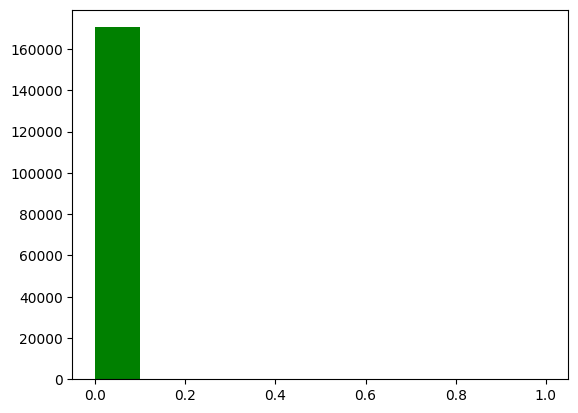

In [8]:
def freq(col):
    plt.hist(col, color='g')

freq(df['Class'])

We can clearly see that the distribution of the target class is huge biased to Non-Fraud transactions

In [9]:
df_dists = df[['Amount','Time']]

In [10]:
df_dists.head()

,Amount,Time
0,8.73,119191.0
1,59.95,71750.0
2,460.65,151977.0
3,4.78,55709.0
4,44.31,66654.0


In [11]:
def dists(df):
    amount = df['Amount'].values
    time = df['Time'].values

    sns.displot(amount, color='green', kde=True)

    sns.displot(time, color='blue', kde=True, element="step")

    plt.show()

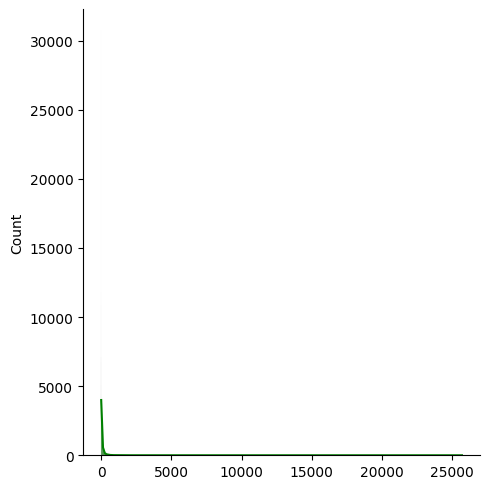

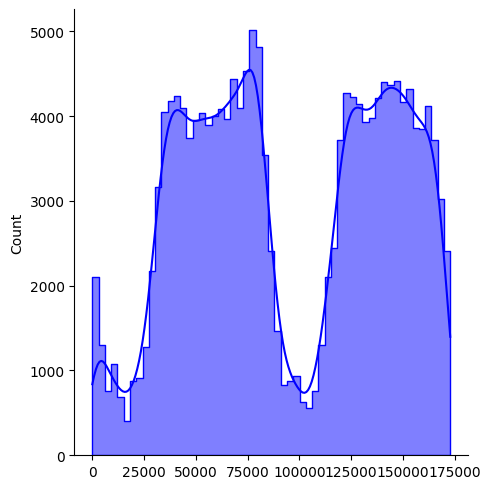

In [12]:
dists(df)

In [13]:
df = df.sample(frac=1)

fraud = df.loc[df['Class'] == 1]
non_fraud = df.loc[df['Class'] == 0][:492]

new_df = pd.concat([fraud, non_fraud])

new_df = new_df.sample(frac=1, random_state=37)

In [14]:
# new_df.to_csv('../data/undersampled_data/data.csv')

### Show difference in relations of balanced and imbalanced data

<Axes: >

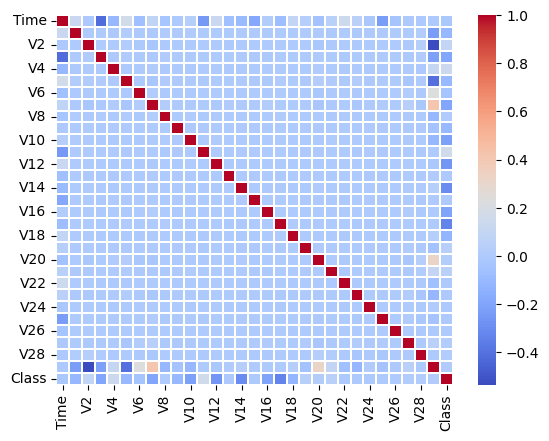

In [15]:
corr = df.corr()
sns.heatmap(corr, square=False, linewidth=0.01, annot=False, cmap='coolwarm')

<Axes: >

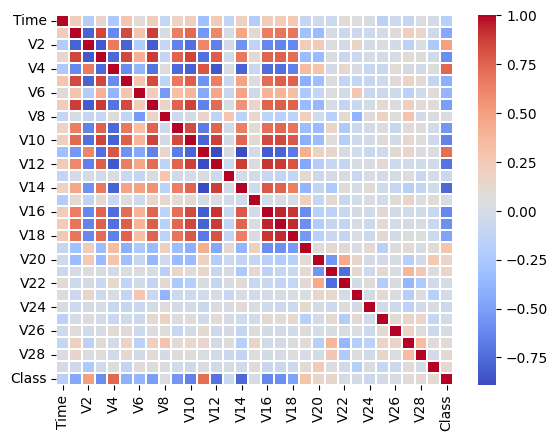

In [16]:
new_corr = new_df.corr()
sns.heatmap(new_corr, square=False, linewidths=0.01, annot=False, cmap='coolwarm')

As we see here, the relation between features in imbalanced data is close to ZERO

<h3>Features correlation with Class: </h3>
<ul>
<li> Negative Correlation: most negative correlated features with Class are V3, V10, V12, V14, V16, V17 </li>
<li> Positive Correlation: most positive correlated features with Class are V2, V4, V11, V19 </li>
<li> Weak Correlation: other features are weakly correlated with the Class</li>
</ul>

### Boxplots

<h5>Use boxplot to display the median value and the range of values covered by the data</h5>

show the Negative Correlation between feature **V14** and the Class

<Axes: xlabel='Class', ylabel='V14'>

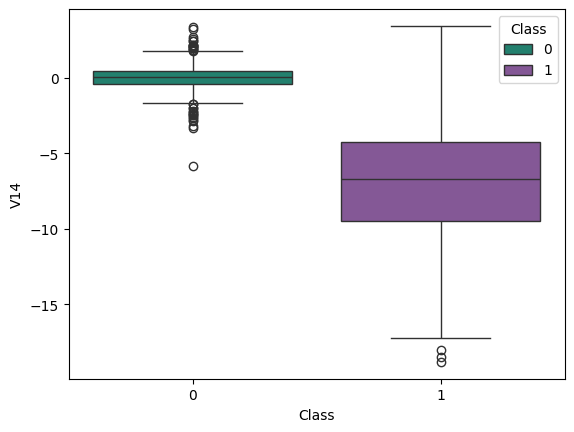

In [17]:
colors = ['#148F77', '#884EA0']
sns.boxplot(x='Class', y='V14', palette=colors, hue='Class', data=new_df)

show the Positive Correlation between feature **V11** and the Class

<Axes: xlabel='Class', ylabel='V11'>

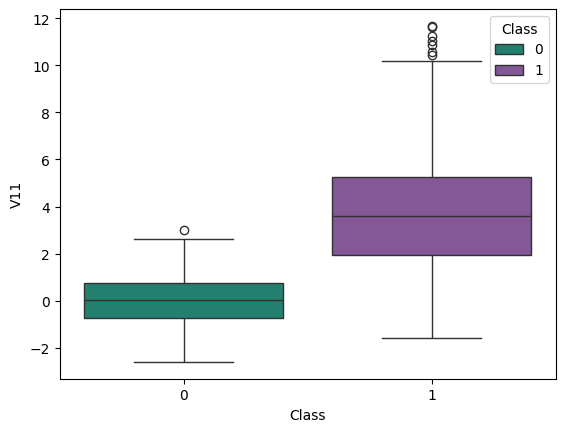

In [18]:
sns.boxplot(x='Class', y='V11', data=new_df, palette=colors, hue='Class', legend=True)

<Axes: xlabel='Class'>

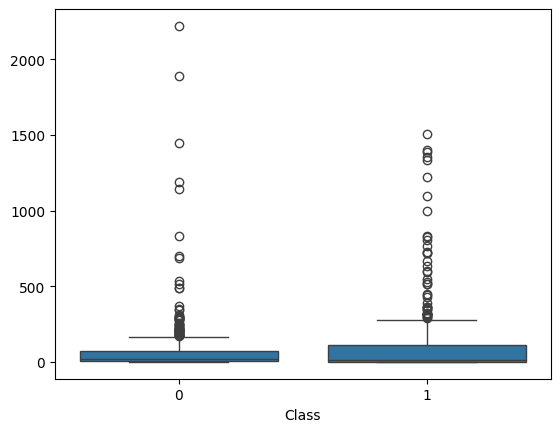

In [19]:
sns.boxplot(x=new_df['Class'], y=new_df['Amount'].values, data=new_df)

### Show Ditrubtion of the perfectly correlated with Class

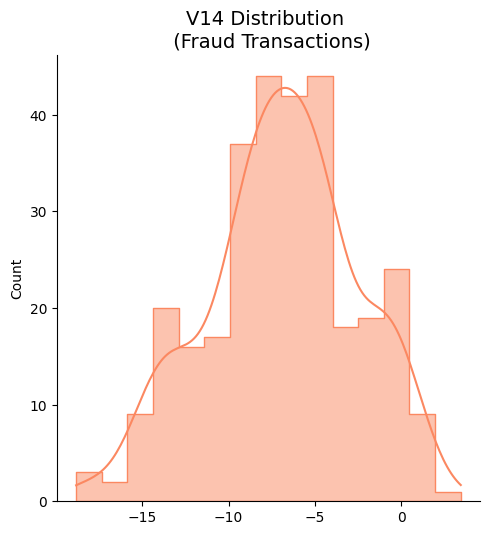

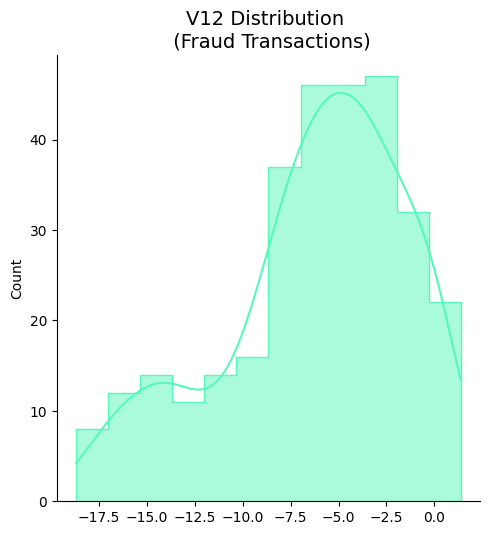

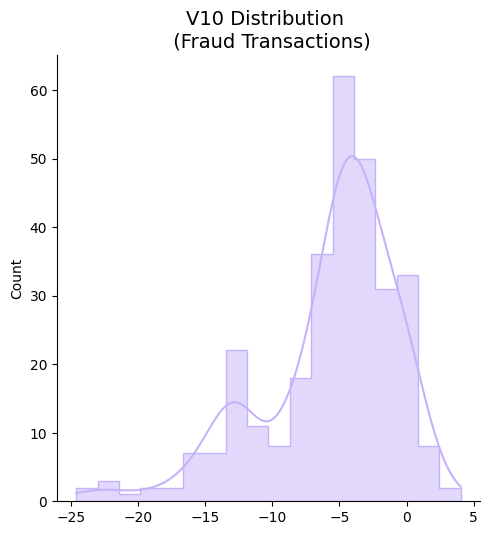

In [20]:
from scipy.stats import norm

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.displot(v14_fraud_dist, color='#FB8861', kde=True, element='step', label='pdf', common_norm=True)
plt.title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.displot(v12_fraud_dist, color='#56F9BB', kind='hist', element='step', kde=True)
plt.title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.displot(v10_fraud_dist, color='#C5B3F9', kde=True, element='step')
plt.title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

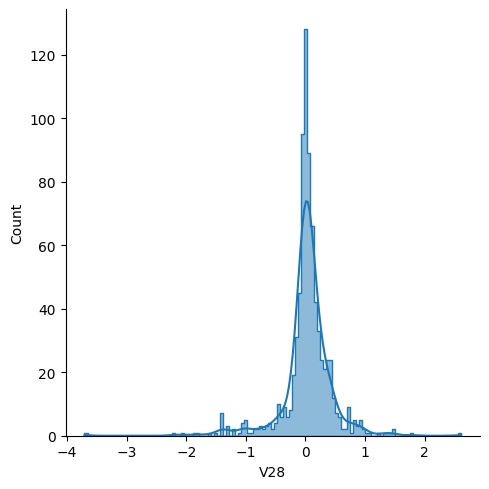

In [21]:
sns.displot(new_df['V28'], kde=True, element='step')